In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from scipy.stats import norm

import statistics
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [42]:
df = pd.read_csv('USA_construction_cost_of _healthcare_project.csv')

In [43]:
df2 = pd.read_csv('Total Production in Building and Construction Sector.csv')

In [44]:
df

County Data Generation Date  OSHPD Project Status  \
0          01 - Alameda            9/30/2013             In Review   
1          01 - Alameda            9/30/2013  Pending Construction   
2          01 - Alameda            9/30/2013       In Construction   
3          01 - Alameda            9/30/2013            In Closure   
4     07 - Contra Costa            9/30/2013             In Review   
...                 ...                  ...                   ...   
4539       56 - Ventura            6/16/2016            In Closure   
4540          57 - Yolo            6/16/2016             In Review   
4541          57 - Yolo            6/16/2016  Pending Construction   
4542          57 - Yolo            6/16/2016       In Construction   
4543          57 - Yolo            6/16/2016            In Closure   

     Total Costs of OSHPD Projects  Number of OSHPD Projects  \
0                     $50914315.00                        45   
1                    $840182510.04                       126   
2                    $994352932.29                       181   
3                     $65255928.88                        81   
4                     $19067925.00                        28   
...                            ...                       ...   
4539                  $18210257.00                        11   
4540                   $4405500.00                         6   
4541                    $680700.00                         7   
4542                   $6919172.00                        14   
4543                    $315970.00                         2   

            Collection of Counties  
0                Bay Area Counties  
1                Bay Area Counties  
2                Bay Area Counties  
3                Bay Area Counties  
4                Bay Area Counties  
...                            ...  
4539  Greater Los Angeles Counties  
4540   Greater Sacramento Counties  
4541   Greater Sacramento Counties  
4542   Greater Sacramento Counties  
4543   Greater Sacramento Counties  

[4544 rows x 6 columns]

# Exploratory  Data Analysis

# Dataset 1

In [45]:
df.shape

(4544, 6)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   County                         4544 non-null   object
 1   Data Generation Date           4544 non-null   object
 2   OSHPD Project Status           4544 non-null   object
 3   Total Costs of OSHPD Projects  4544 non-null   object
 4   Number of OSHPD Projects       4544 non-null   int64 
 5   Collection of Counties         4544 non-null   object
dtypes: int64(1), object(5)
memory usage: 213.1+ KB


In [48]:
# we don't have null values on first dataset
df.isna().sum()

County                           0
Data Generation Date             0
OSHPD Project Status             0
Total Costs of OSHPD Projects    0
Number of OSHPD Projects         0
Collection of Counties           0
dtype: int64

In [49]:
# rename the columns
df.rename(columns = {'County': 'county', 'Data Generation Date': 'year','OSHPD Project Status': 'project_status', 'Total Costs of OSHPD Projects': 'cost','Number of OSHPD Projects': 'no_project','Collection of Counties':'Coll_of_counties'}, inplace= True)

In [50]:
# make sequence for columns
columns = ['year','county','no_project','project_status','Coll_of_counties','cost']

In [51]:
# change the sequence of the features
df= df[columns]

In [52]:
# i just need the year from the data column so i just extracted the year from it
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.strftime('%Y')

In [53]:
# collection of counties column are not usefull and have no insights for my assessment so i drop this column
df.drop('Coll_of_counties',axis=1,inplace=True)

In [54]:
df

year             county  no_project        project_status           cost
0     2013       01 - Alameda          45             In Review   $50914315.00
1     2013       01 - Alameda         126  Pending Construction  $840182510.04
2     2013       01 - Alameda         181       In Construction  $994352932.29
3     2013       01 - Alameda          81            In Closure   $65255928.88
4     2013  07 - Contra Costa          28             In Review   $19067925.00
...    ...                ...         ...                   ...            ...
4539  2016       56 - Ventura          11            In Closure   $18210257.00
4540  2016          57 - Yolo           6             In Review    $4405500.00
4541  2016          57 - Yolo           7  Pending Construction     $680700.00
4542  2016          57 - Yolo          14       In Construction    $6919172.00
4543  2016          57 - Yolo           2            In Closure     $315970.00

[4544 rows x 5 columns]

In [55]:
# count unique values from all features
print(df.nunique())

# show all unique values from all features
for i in df.columns:
    print(i)
    print(df[i].unique())

year                 4
county              16
no_project         405
project_status       4
cost              3675
dtype: int64
year
['2013' '2014' '2015' '2016']
county
['01 - Alameda' '07 - Contra Costa' '09 - El Dorado' '19 - Los Angeles'
 '21 - Marin' '28 - Napa' '30 - Orange' '31 - Placer' '34 - Sacramento'
 '38 - San Francisco' '41 - San Mateo' '43 - Santa Clara' '48 - Solano'
 '49 - Sonoma' '56 - Ventura' '57 - Yolo']
no_project
[ 45 126 181  81  28  43  56  20   6   2   5   4 439 564 868 629  17   9
  21  18   3   8  15  22  99 120 132 189   7  16  36 119  64  67 139 102
  30  72  38  71 168 140  13  11  29  14  23  46  19  37  65  51  44 125
  82 434 568 843 655  12  98 121 133 191  63 136 101  32  42  80 165 141
  24  35  53  50 182  79  27  59   1 410 506 855 677 143 199  39 127  62
  61  73 160 130  34  55 123 184  74  57 421 853 693 145 204 100  75 154
 186  26  47 432 498 856 709 147 206  10  40  58  66  25  76  60 151 134
  41  68 187 436 508 848 732  85 211 118 150 124 

In [56]:
df.dtypes

year              object
county            object
no_project         int64
project_status    object
cost              object
dtype: object

Changing the datatype of columns

In [57]:
# Remove unusual characters from county column
c = df['county'].copy()
c = c.astype(str)
c = c.str[4:]
df['county'] = c

In [58]:
# remove $ sign from cost columm and convert its datatype to float
u = df['cost'].copy()
u = u.astype(str)
u = u.str[1:]
df['cost'] = pd.to_numeric(u, errors='coerce').astype(float)

In [59]:
print(df['cost'][5])

19570172.0


In [62]:
df['year'] = df['year'].astype(int)

In [64]:
df.dtypes

year                int32
county             object
no_project          int64
project_status     object
cost              float64
dtype: object

# Dataset 2

In [66]:
df2

STATISTIC                                    Statistic Label  TLIST(Q1)  \
0     BEQ04C01  Value of Production Index in Building and Cons...      20001   
1     BEQ04C01  Value of Production Index in Building and Cons...      20001   
2     BEQ04C01  Value of Production Index in Building and Cons...      20001   
3     BEQ04C01  Value of Production Index in Building and Cons...      20001   
4     BEQ04C01  Value of Production Index in Building and Cons...      20001   
...        ...                                                ...        ...   
1835  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1836  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1837  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1838  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1839  BEQ04C04  Volume of Production Index in Building and Con...      20224   

     Quarter C02402V02895       Type of Building and Construction  \
0     2000Q1            -           All building and construction   
1     2000Q1           11  Building (excluding civil engineering)   
2     2000Q1          111                    Residential building   
3     2000Q1          112                Non-residential building   
4     2000Q1           12                       Civil engineering   
...      ...          ...                                     ...   
1835  2022Q4            -           All building and construction   
1836  2022Q4           11  Building (excluding civil engineering)   
1837  2022Q4          111                    Residential building   
1838  2022Q4          112                Non-residential building   
1839  2022Q4           12                       Civil engineering   

               UNIT       VALUE  
0     Base 2015=100  143.514977  
1     Base 2015=100  182.795802  
2     Base 2015=100  279.281551  
3     Base 2015=100  115.359508  
4     Base 2015=100   60.438887  
...             ...         ...  
1835  Base 2015=100  125.102539  
1836  Base 2015=100  126.742285  
1837  Base 2015=100  108.239693  
1838  Base 2015=100  130.098153  
1839  Base 2015=100  106.368237  

[1840 rows x 8 columns]

In [21]:
# X = df2.drop(['VALUE'], axis=1)
# y = df2['VALUE']

In [ ]:
# plt.figure(figsize=(12,10))
# cor = X.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [67]:
# drop unusual columns
df2.drop(['Quarter','C02402V02895','UNIT'], axis=1,inplace=True)

In [69]:
df2.rename(columns = {'STATISTIC':'statistic','TLIST(Q1)':'year','Statistic Label':'stats_label','VALUE':'price','Type of Building and Construction':'construction_type'},inplace = True)

In [73]:
uni_values = df2['stats_label'].unique()

In [75]:
df2['stats_label'].replace(to_replace=uni_values,
value= ['production_value','production_volume','seasonally_prod_value','seasonally_prod_volume'],
inplace=True)

In [76]:
x = df2['year'].astype(str)
x = x.str[:4]
df2['year'] = x.astype(int)

In [77]:
df2

statistic             stats_label  year  \
0     BEQ04C01        production_value  2000   
1     BEQ04C01        production_value  2000   
2     BEQ04C01        production_value  2000   
3     BEQ04C01        production_value  2000   
4     BEQ04C01        production_value  2000   
...        ...                     ...   ...   
1835  BEQ04C04  seasonally_prod_volume  2022   
1836  BEQ04C04  seasonally_prod_volume  2022   
1837  BEQ04C04  seasonally_prod_volume  2022   
1838  BEQ04C04  seasonally_prod_volume  2022   
1839  BEQ04C04  seasonally_prod_volume  2022   

                           construction_type       price  
0              All building and construction  143.514977  
1     Building (excluding civil engineering)  182.795802  
2                       Residential building  279.281551  
3                   Non-residential building  115.359508  
4                          Civil engineering   60.438887  
...                                      ...         ...  
1835           All building and construction  125.102539  
1836  Building (excluding civil engineering)  126.742285  
1837                    Residential building  108.239693  
1838                Non-residential building  130.098153  
1839                       Civil engineering  106.368237  

[1840 rows x 5 columns]

# Perform visualization on dataset

<Axes: xlabel='price', ylabel='Count'>

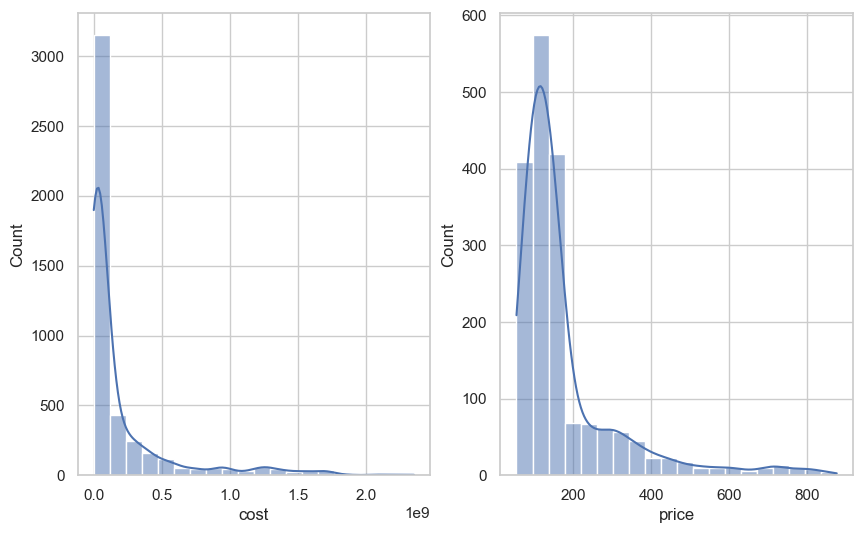

In [112]:
# In this histogram plot you can clearly see that it is the LOGNormal distribution 
fig, axes = plt.subplots(1, 2,figsize=(10, 6))
sns.histplot(df['cost'],bins=20, kde=True, ax=axes[0])
sns.histplot(df2['price'],bins=20, kde=True, ax=axes[1])

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



<Axes: xlabel='price', ylabel='Count'>

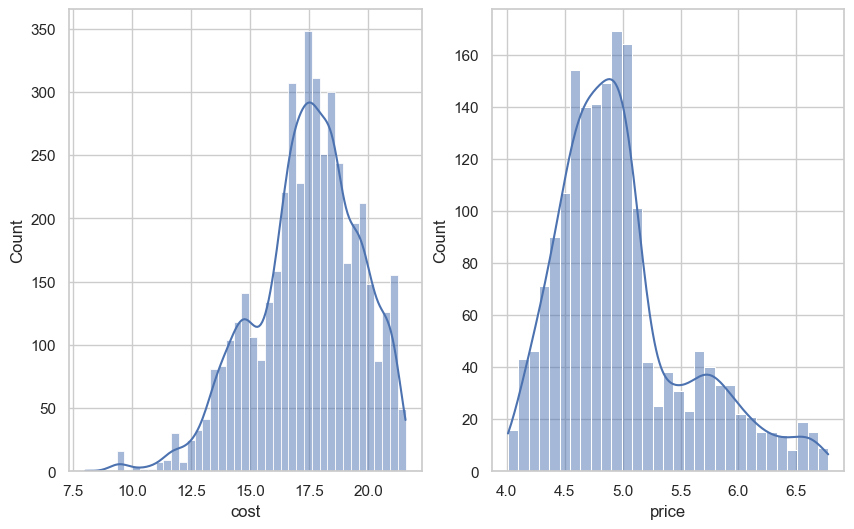

In [111]:
# NOw you see the distribution of price column is similar to the normal distribution becasue taking the log of the LOGnormal
# distribution convert it into normal distribution
fig, axes = plt.subplots(1, 2,figsize=(10, 6))
sns.histplot(np.log(df['cost']), kde=True, ax=axes[0])
sns.histplot(np.log(df2['price']), kde=True, ax=axes[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Alameda'),
  Text(1, 0, ' Contra Costa'),
  Text(2, 0, ' El Dorado'),
  Text(3, 0, ' Los Angeles'),
  Text(4, 0, ' Marin'),
  Text(5, 0, ' Napa'),
  Text(6, 0, ' Orange'),
  Text(7, 0, ' Placer'),
  Text(8, 0, ' Sacramento'),
  Text(9, 0, ' San Francisco'),
  Text(10, 0, ' San Mateo'),
  Text(11, 0, ' Santa Clara'),
  Text(12, 0, ' Solano'),
  Text(13, 0, ' Sonoma'),
  Text(14, 0, ' Ventura'),
  Text(15, 0, ' Yolo')])

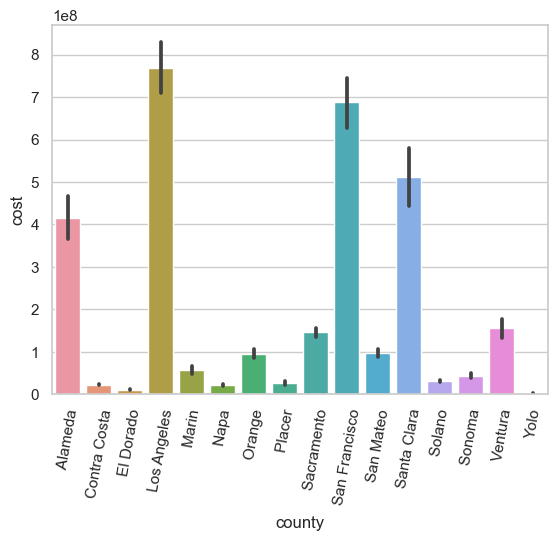

In [113]:
# This is the barplot of cost column with respect to counties

sns.set(style="whitegrid")
sns.barplot(x="county", y="cost", data=df)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All building and construction'),
  Text(1, 0, 'Building (excluding civil engineering)'),
  Text(2, 0, 'Residential building'),
  Text(3, 0, 'Non-residential building'),
  Text(4, 0, 'Civil engineering')])

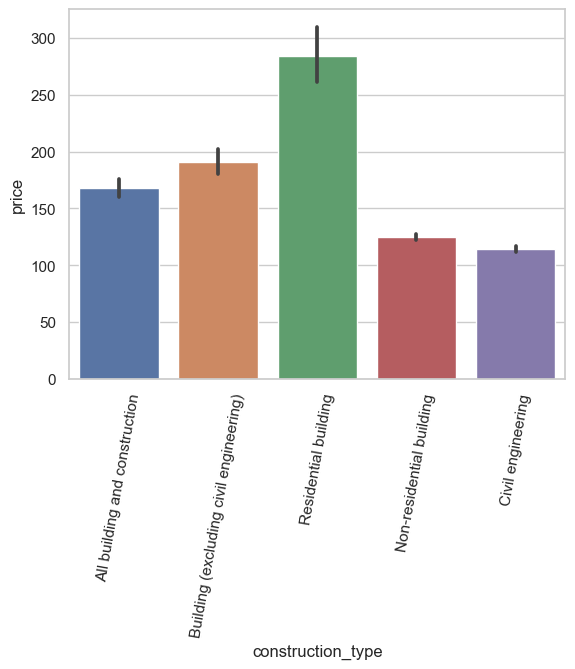

In [110]:
sns.set(style="whitegrid")
sns.barplot(x="construction_type", y="price", data=df2)
plt.xticks(rotation=80)

In [81]:
# In this boxxplot graph you can see the detail of all datasset 
figure = px.box(df, x='county', y='cost')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

You see the inflation in the values of the cost column so we are unable to understand the plots 
so now im going to take log of cost column for removing the inflation

In [114]:
log_df = df.copy()
log_df['cost'] = np.log(log_df['cost'])

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [84]:
# now you see this plot is much better from previous bosplot
figure = px.box(log_df, x='county', y='cost')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

In [115]:
# Bocplot for the second dataframe
figure = px.box(df2, x='construction_type', y='price')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

In [165]:
df

year         county  no_project        project_status          cost
0     2013        Alameda          45             In Review  5.091432e+07
1     2013        Alameda         126  Pending Construction  8.401825e+08
2     2013        Alameda         181       In Construction  9.943529e+08
3     2013        Alameda          81            In Closure  6.525593e+07
4     2013   Contra Costa          28             In Review  1.906792e+07
...    ...            ...         ...                   ...           ...
4539  2016        Ventura          11            In Closure  1.821026e+07
4540  2016           Yolo           6             In Review  4.405500e+06
4541  2016           Yolo           7  Pending Construction  6.807000e+05
4542  2016           Yolo          14       In Construction  6.919172e+06
4543  2016           Yolo           2            In Closure  3.159700e+05

[4544 rows x 5 columns]

In [125]:
df[df['year'] == 2013]['no_project'].sum()

37615

In [183]:
total_by_year = {}
a=[]
b=[]
for i in df['year'].unique():
    filt =(df['year'] == i )
    x = df['no_project'][filt].sum()
    print(i," = ",x)
#     a.append(i)
#     b.append(x)
    total_by_year.update({i:x})  
# total_by_year.update({'year':a,'total':b})    

2013  =  37615
2014  =  134370
2015  =  143245
2016  =  56304


In [189]:
t_proj_by_year = pd.DataFrame(total_by_year,index=[1])

In [190]:
t_proj_by_year

2013    2014    2015   2016
1  37615  134370  143245  56304

<Axes: >

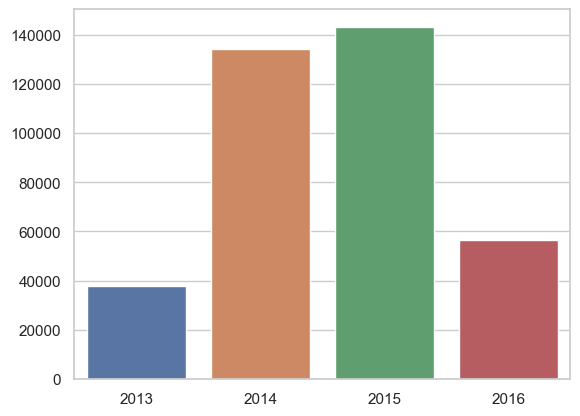

In [191]:
# This plot shows how many projects are done in USA by year, it shows that USA do 37615 construction project in 2013 etc
sns.barplot(data=t_proj_by_year)

In [192]:
df

year         county  no_project        project_status          cost
0     2013        Alameda          45             In Review  5.091432e+07
1     2013        Alameda         126  Pending Construction  8.401825e+08
2     2013        Alameda         181       In Construction  9.943529e+08
3     2013        Alameda          81            In Closure  6.525593e+07
4     2013   Contra Costa          28             In Review  1.906792e+07
...    ...            ...         ...                   ...           ...
4539  2016        Ventura          11            In Closure  1.821026e+07
4540  2016           Yolo           6             In Review  4.405500e+06
4541  2016           Yolo           7  Pending Construction  6.807000e+05
4542  2016           Yolo          14       In Construction  6.919172e+06
4543  2016           Yolo           2            In Closure  3.159700e+05

[4544 rows x 5 columns]

In [207]:
type_proj = {}
for c in df['county'].unique():
    filt =(df['county'] == c)
    x = df['no_project'][filt].sum()
    print(c," = ",x)
    type_proj.update({c:x})

 Alameda  =  29170
 Contra Costa  =  10847
 El Dorado  =  1570
 Los Angeles  =  175576
 Marin  =  4808
 Napa  =  3853
 Orange  =  35986
 Placer  =  5071
 Sacramento  =  20774
 San Francisco  =  20832
 San Mateo  =  9268
 Santa Clara  =  24141
 Solano  =  5224
 Sonoma  =  8096
 Ventura  =  14436
 Yolo  =  1882


In [212]:
type_proj = pd.DataFrame(type_proj , index=[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Alameda'),
  Text(1, 0, ' Contra Costa'),
  Text(2, 0, ' El Dorado'),
  Text(3, 0, ' Los Angeles'),
  Text(4, 0, ' Marin'),
  Text(5, 0, ' Napa'),
  Text(6, 0, ' Orange'),
  Text(7, 0, ' Placer'),
  Text(8, 0, ' Sacramento'),
  Text(9, 0, ' San Francisco'),
  Text(10, 0, ' San Mateo'),
  Text(11, 0, ' Santa Clara'),
  Text(12, 0, ' Solano'),
  Text(13, 0, ' Sonoma'),
  Text(14, 0, ' Ventura'),
  Text(15, 0, ' Yolo')])

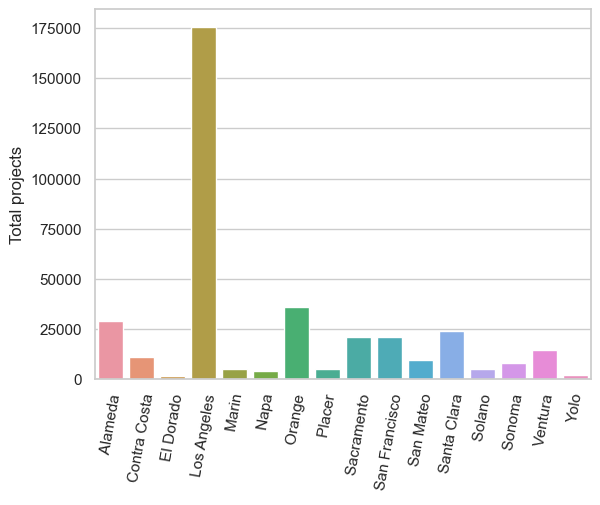

In [216]:
# This graph shows that how many number of projects
sns.barplot(type_proj)
plt.ylabel('Total projects')
plt.xticks(rotation=80)

In [250]:
df

year         county  no_project        project_status          cost
0     2013        Alameda          45             In Review  5.091432e+07
1     2013        Alameda         126  Pending Construction  8.401825e+08
2     2013        Alameda         181       In Construction  9.943529e+08
3     2013        Alameda          81            In Closure  6.525593e+07
4     2013   Contra Costa          28             In Review  1.906792e+07
...    ...            ...         ...                   ...           ...
4539  2016        Ventura          11            In Closure  1.821026e+07
4540  2016           Yolo           6             In Review  4.405500e+06
4541  2016           Yolo           7  Pending Construction  6.807000e+05
4542  2016           Yolo          14       In Construction  6.919172e+06
4543  2016           Yolo           2            In Closure  3.159700e+05

[4544 rows x 5 columns]

# Hypothesis Testing

# One sample T-test

Lets do One_sample test on cost column of dataset.
Lets find out that the mean of population is different or same as the sample mean.

H0 (Null Hypothesis) = population mean is not different from sample mean
H1 (Alternate hypothesis) =  population mean is different from sample mean

In [221]:
cost_mean = df['cost'].mean()
cost_mean

193292266.7294608

In [222]:
sample_size=1000
cost_sample=np.random.choice(df['cost'],sample_size)

In [223]:
ttest,p_value=ttest_1samp(cost_sample,193292266.7294608)
print(p_value)

0.936385056484665


In [224]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


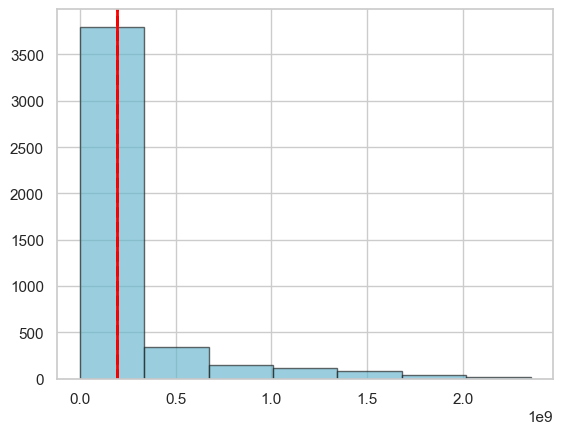

In [243]:
result = plt.hist(df['cost'], bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(df['cost'].mean(), color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

I'm trying to do one sample testing on different dataset

In [225]:
df_ireland.shape

(1840, 8)

In [226]:
value_mean = df_ireland['VALUE'].mean()
value_mean

176.63252246174923

In [227]:
s_size=500
value_sample=np.random.choice(df_ireland['VALUE'],s_size)

In [228]:
ttest,p_value=ttest_1samp(value_sample,176.63252246174923)
print(p_value)

0.38583971063584344


In [229]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Two sample t-test

In [247]:
dfx = df[(df.project_status=='In Review')]
dfy = df[(df.project_status=='In Construction')]

In [248]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=dfx['cost'], b=dfy['cost'])

Ttest_indResult(statistic=-13.093885170610697, pvalue=8.076625404468019e-38)

In [249]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Two pair test

In [230]:
cost_second_sample = np.random.choice(df['cost'],sample_size)

In [231]:
difference = pd.DataFrame({
    'cost_Sample': cost_sample,
    'second_cost_sample': cost_second_sample,
    'difference' : cost_sample - cost_second_sample
})

In [232]:
difference

cost_Sample  second_cost_sample   difference
0    263544436.0         785309203.0 -521764767.0
1       362731.0            699901.0    -337170.0
2     18645394.0          38312070.0  -19666676.0
3     63616090.0           1613658.0   62002432.0
4      2213311.0          84914456.0  -82701145.0
..           ...                 ...          ...
995   18886084.0          14168255.0    4717829.0
996   88477372.0          59951920.0   28525452.0
997   73512452.0         214848126.0 -141335674.0
998    9538943.0         959931341.0 -950392398.0
999  149347165.0         336087725.0 -186740560.0

[1000 rows x 3 columns]

In [233]:
_,p_value=stats.ttest_rel(a=cost_sample, b=cost_second_sample)

In [234]:
p_value

0.43903675208250803

In [235]:
# it says that there is a maximum difference in the two particular groups
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


Apply on ireland dataset

In [236]:
value_2_sample = np.random.choice(df_ireland['VALUE'],s_size)

In [237]:
diff_ire = pd.DataFrame({
    'cost_Sample': value_sample,
    'second_cost_sample': value_2_sample,
    'difference' : value_sample - value_2_sample
})

In [238]:
diff_ire

cost_Sample  second_cost_sample  difference
0     156.250288          105.078265   51.172023
1     145.936030           73.314504   72.621526
2     128.105499          658.753069 -530.647570
3      98.134960           83.153910   14.981050
4     150.291338          172.429200  -22.137861
..           ...                 ...         ...
495   168.254866           77.258879   90.995988
496   137.256262          182.008656  -44.752393
497   105.790654          153.439866  -47.649212
498   140.952099          111.808380   29.143718
499   116.546849          135.040230  -18.493382

[500 rows x 3 columns]

In [239]:
_,p_value=stats.ttest_rel(a=value_sample, b=value_2_sample)

In [240]:
p_value

0.1273000271217827

In [241]:
# it says that there is a maximum difference in the two particular groups
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")
    

we are accepting null hypothesis


# Chi-square test

In [68]:
chi = pd.crosstab(df['county'], df['no_project'])

In [75]:
observed_values = chi.values

In [70]:
val = stats.chi2_contingency(chi)

In [71]:
val

Chi2ContingencyResult(statistic=17434.853569147566, pvalue=0.0, dof=6060, expected_freq=array([[0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       ...,
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625]]))

In [72]:
expected_values = val[3]

In [73]:
expected_values

array([[0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       ...,
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625]])

In [74]:
no_of_rows=len(chi.iloc[0:2,0])
no_of_columns=len(chi.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [78]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [80]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 321.6


In [81]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
     

critical_value: 3.841458820694124


In [82]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [83]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# Splitting dataset for training

In [26]:
X = df.drop(['cost'], axis=1)
y = df['cost']

In [ ]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [27]:
cat_col = X.select_dtypes(include=[object]).columns
cat_col

Index(['county', 'project_status'], dtype='object')

# one-hot encoding

In [28]:
x_dummies = pd.get_dummies(X[cat_col], prefix = ['county','project_status'])

In [29]:
x_dummies.shape

(4544, 20)

In [30]:
X.drop(['county','project_status'], axis=1, inplace =True)

In [31]:
X = pd.concat([X,x_dummies] ,axis=1)

Apply standardscalar on trainig set 

In [32]:
sc = StandardScaler()

In [33]:
x_scalar = sc.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.20, random_state =5)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3635, 22), (3635,), (909, 22), (909,))

# Random Forest regressor

In [138]:
rf = RandomForestRegressor(criterion='absolute_error')

estimator =  10
Training accuracy = 0.9910232887624518
Testing accuracy = 0.9565476093691376
Accuracy After cross_validation:  0.9600054037989482
estimator =  20
Training accuracy = 0.9914095041460077
Testing accuracy = 0.9556834882371329
Accuracy After cross_validation:  0.9606257941969327
estimator =  30
Training accuracy = 0.9919490837521406
Testing accuracy = 0.9561196173108742
Accuracy After cross_validation:  0.9602045146585979
estimator =  40
Training accuracy = 0.9919301246460319
Testing accuracy = 0.9581189596651867
Accuracy After cross_validation:  0.9608594013175107


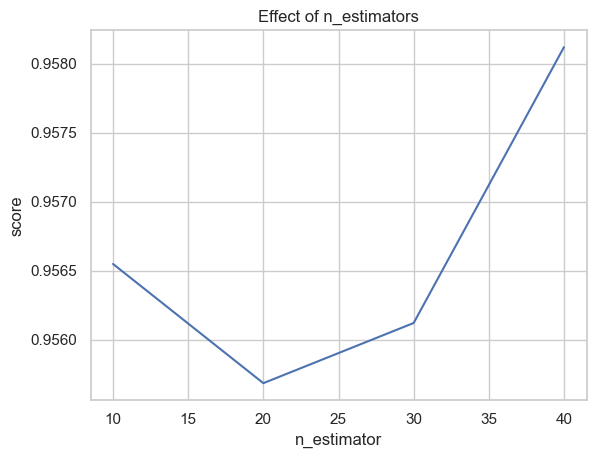

In [140]:
# i set n_estimator/Decision trees between 50 to 200  and checking the difference
estimators = np.arange(10,50, 10)

scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    t = rf.score(X_train,y_train)
    s = rf.score(X_test, y_test)
    score = cross_val_score(rf,X_train,y_train,cv = 5)
    print('estimator = ',n)
    print('Training accuracy =',t)
    print('Testing accuracy =',s)
    print("Accuracy After cross_validation: ", score.mean())
    scores.append(s)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

Accuracy before cross_validation:  0.9480135812109991
Accuracy After cross_validation:  0.9539365124192379
Mean Square Error:  5995798683199747.0
Mean Absolute Error:  21836271.143131502


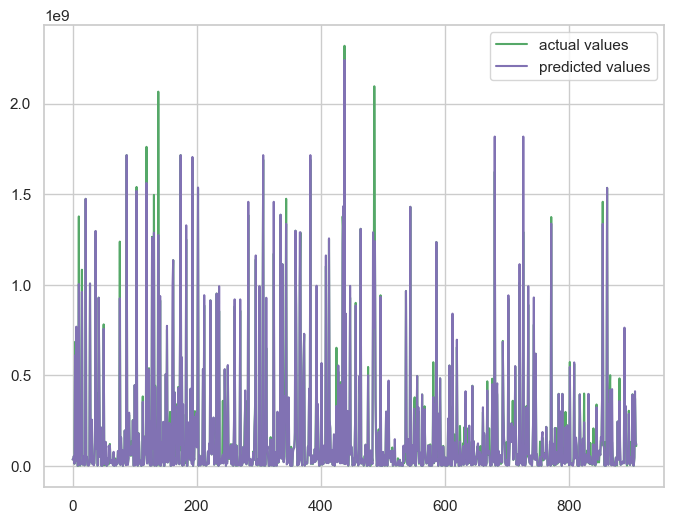

In [141]:
# Decision Tree
dt = DecisionTreeRegressor(criterion='squared_error',splitter = 'random')


dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

score = cross_val_score(dt,X_train,y_train,cv = 5)

print("Accuracy before cross_validation: ",r2_score(y_test,dt_pred))
print("Accuracy After cross_validation: ", score.mean())
print("Mean Square Error: ", mean_squared_error(y_test,dt_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,dt_pred))


# check difference between actual target values and predicted values by graph
plt.figure(figsize=(8, 6))
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
plt.plot([i for i in range(len(y_test))],dt_pred, c='m',label="predicted values")
plt.legend()
plt.show()

# Random SearchCV

In [142]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = [1,3,5,8,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 11,16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 9,12,22]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':["squared_error", "absolute_error", "poisson"]}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': [1, 3, 5, 8, 10], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'min_samples_split': [2, 4, 11, 16], 'min_samples_leaf': [1, 5, 9, 12, 22], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [143]:
rf2 = RandomForestRegressor()
rf_searchcv=RandomizedSearchCV(estimator=rf2,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_searchcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': [1, 3, 5, 8, 10],
                                        'min_samples_leaf': [1, 5, 9, 12, 22],
                                        'min_samples_split': [2, 4, 11, 16],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=100, verbose=2)

In [144]:
pred = rf_searchcv.predict(X_test)

In [145]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
print("Accuracy : ",r2_score(y_test,pred), " MSE :",mse, " MAE", mae)
print("Train accuracy",rf_searchcv.score(X_train,y_train))
print("Test accuracy",rf_searchcv.score(X_test,y_test))

Accuracy :  0.9634555418395363  MSE : 4214816469779898.5  MAE 22858652.32148332
Train accuracy 0.9892001953250598
Test accuracy 0.9634555418395363


In [146]:
# show best parameters for random forest regressor
rf_searchcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 73,
 'criterion': 'squared_error'}

In [147]:
best_estimator = rf_searchcv.best_estimator_

# Grid SearchCV

In [148]:
# Best parameters from Random Search CV
rf_searchcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 73,
 'criterion': 'squared_error'}

In [149]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
max_features = [1,3,5]
max_depth = [2,7,12]
min_samples_split = [1, 4]
min_samples_leaf = [3, 8]


param_grid = {
    'criterion': ["squared_error", "absolute_error", "poisson"],
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators 
}
print(param_grid)

{'criterion': ['squared_error', 'absolute_error', 'poisson'], 'max_depth': [2, 7, 12], 'max_features': [1, 3, 5], 'min_samples_leaf': [3, 8], 'min_samples_split': [1, 4], 'n_estimators': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50]}


In [150]:
rf3 = RandomForestRegressor()
rf_gridcv = GridSearchCV(rf3,param_grid=param_grid,cv=2,verbose=2,n_jobs=-1)

rf_gridcv.fit(X_train,y_train)

Fitting 2 folds for each of 2160 candidates, totalling 4320 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 7, 12], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [3, 8],
                         'min_samples_split': [1, 4],
                         'n_estimators': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24,
                                          26, 29, 31, 34, 37, 39, 42, 44, 47,
                                          50]},
             verbose=2)

In [151]:
grid_pred = rf_searchcv.predict(X_test)

In [152]:
mse = metrics.mean_absolute_error(y_test,grid_pred)
print("Accuracy : ",r2_score(y_test,grid_pred), " MSE :",mse)
print("Train accuracy",rf_searchcv.score(X_train,y_train))
print("Test accuracy",rf_searchcv.score(X_test,y_test))

Accuracy :  0.9634555418395363  MSE : 22858652.32148332
Train accuracy 0.9892001953250598
Test accuracy 0.9634555418395363


In [153]:
print(rf_gridcv.best_params_)
print(rf_searchcv.best_params_)

{'criterion': 'squared_error', 'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 42}
{'n_estimators': 73, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 73, 'criterion': 'squared_error'}


# Ridge Regression

In [167]:
ridge_para = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridge_para.fit(X_train, y_train)

ridge = ridge_para.best_estimator_
print("Training Accuracy: ",ridge.score(X_train,y_train))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training Accuracy:  0.6589801847067578


In [168]:
ridge_pred = ridge.predict(X_test)
print(' ------Testing Statistics-------')
print("Testing Accuracy: ",ridge.score(X_test,y_test))
print("Mean Square Error: ", mean_squared_error(y_test,ridge_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,ridge_pred))

 ------Testing Statistics-------
Testing Accuracy:  0.631208695119531
Mean Square Error:  4.253415549073498e+16
Mean Absolute Error:  130326595.34800482


# Lasso Regression

In [169]:
lasso_para = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1,2]
                    }, verbose=1)

lasso_para.fit(X_train, y_train)

lasso = lasso_para.best_estimator_
print("Training Accuracy: ",lasso.score(X_train,y_train))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+19, tolerance: 3.921e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+19, tolerance: 3.907e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+19, tolerance: 3.870e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\si

Training Accuracy:  0.6589817984145465


C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.625e+19, tolerance: 4.835e+16



In [170]:
lasso_pred = lasso.predict(X_test)
print(' ------Testing Statistics-------')
print("Testing Accuracy: ",lasso.score(X_test,y_test))
print("Mean Square Error: ", mean_squared_error(y_test,lasso_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,lasso_pred))

 ------Testing Statistics-------
Testing Accuracy:  0.6311462020857366
Mean Square Error:  4.254136305875875e+16
Mean Absolute Error:  130309485.84875537


In [161]:
# # KNearestNeighbours
# knn = KNeighborsRegressor()

# knn.fit(X_train,y_train)

# knn_pred = knn.predict(X_test)
# score = cross_val_score(knn,X_train,y_train,cv = 5)

# print("Accuracy before cross_validation: ",r2_score(y_test,knn_pred))
# print("Accuracy After cross_validation: ", score.mean())
# print("Mean Square Error: ", mean_squared_error(y_test,knn_pred))
# print("Mean Absolute Error: ", mean_absolute_error(y_test,knn_pred))

Accuracy before cross_validation:  0.6312119305267454
Accuracy After cross_validation:  0.6555234707154379
Mean Square Error:  4.253378233846237e+16
Mean Absolute Error:  130411285.34170182


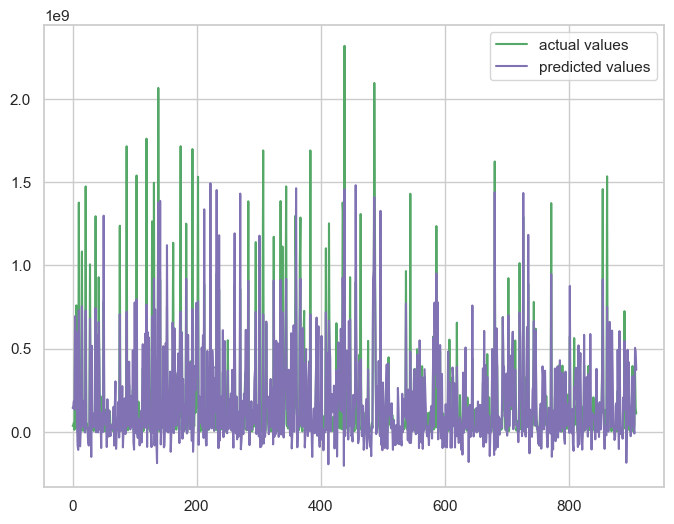

In [166]:
#Linear regression model
lg = LinearRegression()

lg.fit(X_train,y_train)

lg_pred = lg.predict(X_test)
# applying cross-valiation 
score = cross_val_score(lg,X_train,y_train,cv = 5)

print("Accuracy before cross_validation: ",r2_score(y_test,lg_pred))
print("Accuracy After cross_validation: ", score.mean())
print("Mean Square Error: ", mean_squared_error(y_test,lg_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,lg_pred))


# check difference between actual target values and predicted values by graph
plt.figure(figsize=(8, 6))
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
plt.plot([i for i in range(len(y_test))],lg_pred, c='m',label="predicted values")
plt.legend()
plt.show()